In [84]:
import mido

def leer_archivo_midi(ruta_archivo):
    try:
        mid = mido.MidiFile(ruta_archivo)
        return mid
    except Exception as e:
        print("Error al leer el archivo MIDI:", e)
        return None


def dividir_pistas(mid, canal_deseado):
    mensajes_filtrados = []  # Usar una lista para almacenar mensajes filtrados
    tiempo_anterior = 0  # Inicializar el tiempo del mensaje anterior

    for track in mid.tracks:
        tiempo_acumulado = 0  # Reiniciar el tiempo acumulado para cada pista
        for msg in track:
            if hasattr(msg, 'channel') and msg.channel == canal_deseado:
                # Copiar el mensaje para modificarlo sin alterar el original
                tiempo_acumulado += msg.time  # Acumular el tiempo desde el último mensaje
                msg_copia = msg.copy(time=tiempo_acumulado - tiempo_anterior)  # Establecer el tiempo relativo
                tiempo_anterior = tiempo_acumulado  # Actualizar el tiempo anterior
                mensajes_filtrados.append(msg_copia)  # Agregar el mensaje copiado a la lista

    return mensajes_filtrados

# Ruta del archivo MIDI y canal deseado
ruta_archivo_midi = 'test_song.mid'
canal_deseado = 4
# Cambiar al canal deseado

# Leer el archivo MIDI
archivo_midi = leer_archivo_midi(ruta_archivo_midi)

if archivo_midi:
    # Obtener mensajes MIDI filtrados por el canal deseado
    mensajes_midi = dividir_pistas(archivo_midi, canal_deseado)

else:
    print("No se pudo leer el archivo MIDI.")
    
print(mensajes_midi)

[Message('control_change', channel=4, control=121, value=0, time=4), Message('control_change', channel=4, control=0, value=0, time=4), Message('control_change', channel=4, control=32, value=0, time=4), Message('program_change', channel=4, program=90, time=4), Message('control_change', channel=4, control=7, value=100, time=4), Message('control_change', channel=4, control=10, value=64, time=0), Message('control_change', channel=4, control=11, value=127, time=0), Message('control_change', channel=4, control=91, value=127, time=4), Message('control_change', channel=4, control=93, value=0, time=0), Message('control_change', channel=4, control=101, value=0, time=4), Message('control_change', channel=4, control=100, value=0, time=4), Message('control_change', channel=4, control=6, value=12, time=4), Message('control_change', channel=4, control=101, value=127, time=4), Message('control_change', channel=4, control=100, value=127, time=4), Message('note_on', channel=4, note=70, velocity=87, time

[  0   0   0   0   8   8   8   8   8   8   8   8  16  16  16  16  16  16
  16  16  24  24  24  24  24  24  24  24 128 128 128 128 128 128 128 128
 136 136 136 136 136 136 136 144 144 144 144 144 144 144 152 152 152 152
 152 152 152 152 160 160 160 160 160 160 160 160 168 168 168 168 168 168
 168 168 272 272 272 272 272 272 272 272 280 280 280 280 280 280 280 288
 288 288 288 288 288 288 296 296 296 296 296 296 296 296 304 304 304 304
 304 304 304 304 312 312 312 312 312 312 312 312 408 408 408 408 408 408
 408 408 416 416 416 416 416 416 416 424 424 424]


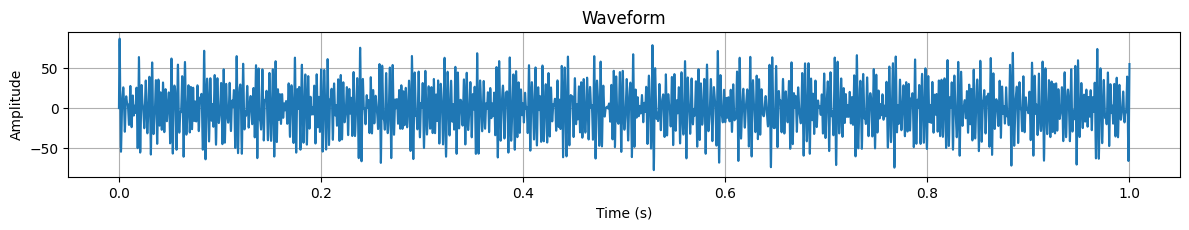

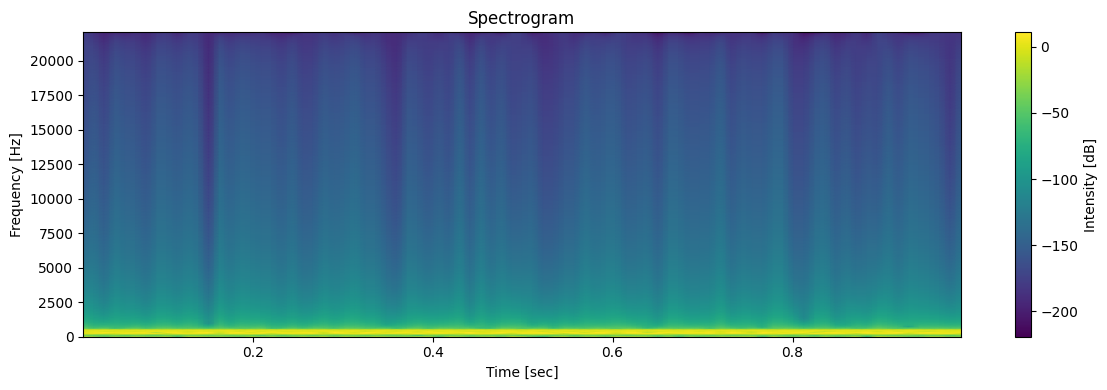

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

def parse_data(data):
    times = []
    notes = []
    velocities = []
    current_time = 0  # Inicializamos el tiempo actual en 0

    for message in data:
        if message.type == 'note_on' or message.type == 'note_off':
            current_time += message.time  # Actualizamos el tiempo actual
            times.append(current_time)
            notes.append(message.note)
            velocities.append(message.velocity)

    return np.array(times), np.array(notes), np.array(velocities)

def generate_sine_wave(frequency, amplitude, duration, sampling_rate):
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * frequency * t)
    return wave

def plot_temporal_with_sine(notes, velocities, duration=1.0, sampling_rate=44100):
    time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
    composite_wave = np.zeros_like(time)

    for note, velocity in zip(notes, velocities):
        frequency = 440 * (2 ** ((note - 69) / 12))  # Fórmula para calcular la frecuencia de una nota MIDI
        amplitude = velocity / 127.0  # Normalizamos la velocidad al rango [0, 1]
        wave = generate_sine_wave(frequency, amplitude, duration, sampling_rate)
        composite_wave += wave

    return time , composite_wave


def plot_temporal(times, notes, velocities):
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    time, wave = plot_temporal_with_sine(notes, velocities)
    plt.plot(time, wave)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.grid()
    plt.ylabel('Amplitude')
    plt.tight_layout()
    
import numpy as np
from scipy import signal
    
def plot_spectrogram(time, wave, sr=44100):
    plt.figure(figsize=(12, 4))
    #Hacer dtft con una ventana de 1024 muestras y una fs = 44100
    f, t, Sxx = signal.spectrogram(wave, fs = sr, nperseg = 1024, noverlap = 512, nfft = 1024, window = 'hann')

    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    
    plt.title('Spectrogram')
    #hacer eje y logaritmico
    plt.colorbar( label='Intensity [dB]')
    
        
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.tight_layout()
    plt.show()

# def plot_spectrogram(times, notes, sr=44100):
#     y = np.zeros(times[-1] + 1)
#     for i in range(len(times)):
#         y[times[i]:times[i] + 4] = notes[i]

#     plt.figure(figsize=(12, 4))
#     librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y, hop_length=512), ref=np.max),
#                              sr=sr, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Spectrogram')
#     plt.tight_layout()
#     plt.show()




# Procesar los datos
times, notes, velocities = parse_data(mensajes_midi)

print(times)

# Graficar visualización temporal
plot_temporal(times, notes, velocities)

time, wave = plot_temporal_with_sine(notes, velocities)
# Graficar espectrograma
plot_spectrogram(times, wave)


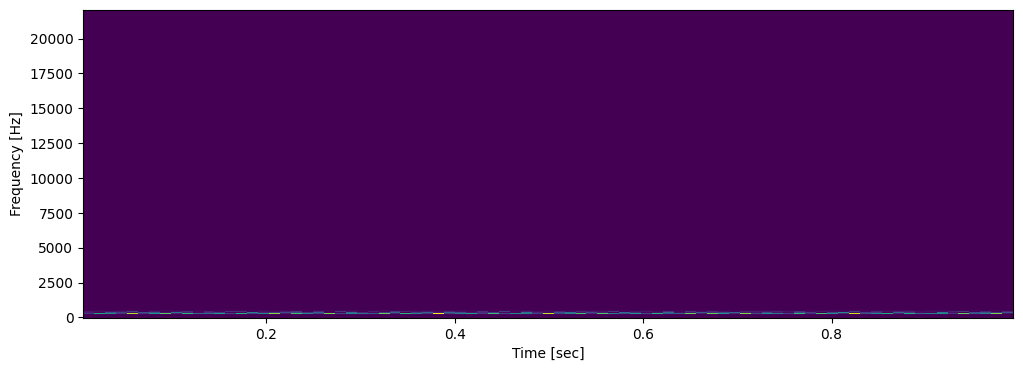

In [128]:

#codigo para poder hacerle zoom a los graficos de matplotlib
import matplotlib.pyplot as plt




#Graficar espectrograma con la señal de arriba
f, t, Sxx = signal.spectrogram(wave, fs = 44100, nperseg = 1024, noverlap = 512, nfft = 1024)

#make fft with a window of 1024 samples and a fs = 44100
plt.figure(figsize=(12, 4))

plt.pcolormesh(t, f, Sxx)
#hacer eje y logaritmico y entre el rango de 0 a 1000
# plt.yscale('log')
# plt.ylim(0, 700)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# plt.plot(time, wave)
# plt.title('Waveform')
# plt.xlabel('Time (s)')
# plt.grid()
# plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()


# # print(Sxx[0])
# plt.plot(f, 10 * np.log10(Sxx[:, 1]))
# plt.title('Spectrogram')
# plt.ylabel('Intensity [dB]')
# plt.xlabel('Frequency [Hz]')
# plt.tight_layout()
# plt.show()
